In [1]:
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# my modules
from ReadFile import Read
from CenterOfMass import CenterOfMass
from MassProfile import MassProfile

# for contours
import scipy.optimize as so
#phoutils isophote
from Snap import dvectors, deriv, graph
from graphs import find_confidence_interval, density_contour, create_graph, create_graph2, RotateFrame


My Topic: 
        Mass loss of dark matter and changes to the 
        internal dark matter profile of halos


Question that I am trying to answer:
        What is the #D shape of the dark matter distribution of M33 - 
        how does this change with time? Is it elongated/ellipsoid or spherical?
        what do terms like prolate, oblate, or triaxal halos mean


Right now I am focusing on determining what snapshots represent M33 at
its apecenter, pericenter, and midpoints in its orbit during the orbit
around M31
I have also made a first attempt at graphing those contour diagrams




I need to create a code meant to evaluate how the dark matter halo of the
M33 Galaxy evolves.
In order to do this, I am going to be looking a contour fitting of the dark matter halo,
as well as making density profiles of the dark matter in the galaxy.

I am going to be looking at several different snapshots during important moments of the merger. 
With this, I will be able to examine theevolution of M33.



First, I need to determine the points during the merger that I would like to look at
To start, I am going to look at a couple the pericenters and apocentes of M33s dark matter halo
in order to determine the snapshots that I would like to graph



In [3]:
"""
Here I am loading in the data that was calculated during homework 6
to get the position of M33 and M31 at several different points in time
"""
dataM31 = np.genfromtxt("orbit_M31.txt",dtype=None,names=True)
dataM33 = np.genfromtxt("orbit_M33.txt",dtype=None,names=True)

In [5]:
M3133 = dvectors(dataM31,dataM33)

In [7]:
dist, vel, time = M3133

In [9]:
#a,at,p,pt,index,points,points_t,an,pn = deriv(dist,vel,time)
apo_snaps, peri_snaps, mid_snaps, at, pt = deriv(dist,vel,time)

Below is a graph meant to test the deriv function is properly returning the apocenter and pericenter times. (It does, yay)

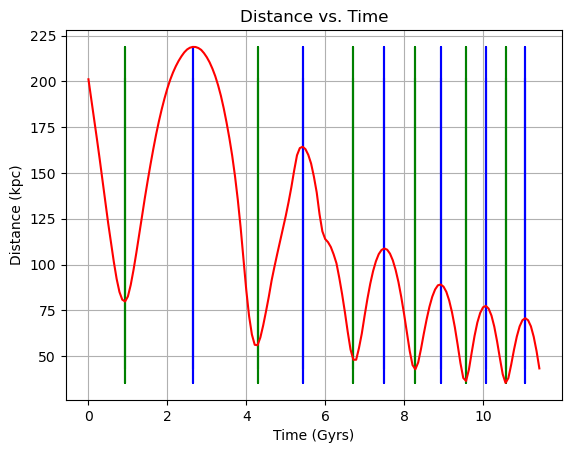

In [12]:
graph(M3133[0],M3133[2],pt,at)

Now I have narrowed down the most important snaps to these:

In [15]:
print (f"the apo snaps are {apo_snaps}")
print (f"the peri snaps are {peri_snaps}")
print (f"the midpoint snaps are {mid_snaps}")
print ('the initial snap is 000')

the apo snaps are [185 380 525 625 705 775]
the peri snaps are [ 65 300 470 580 670 740]
the midpoint snaps are [125 240 340 425 500 550 600 650 690 720 760]
the initial snap is 000


From this point on, I am going to be looking at 6 snap points

snap 000: because it is at the start

snap 300: it is a pericenter point relativley close to the time that M31 and MW merge

snap 340: it is a mid point really close to the time that M31 and MW merge

snap 380: it is an apocenter point shortly after the time that M31 and MW merge

snap 705: it is an apocenter point far after the time that M31 and MW merge

snap 740: it is a pericenter point far after the time that M31 and MW merge

In [18]:
# Define theses snaps to a list
snaps = [000,300,340,380,705,740]

In [20]:
#print (dist[0])
r = []
for i in snaps:
    r.append(dist[int(i/5)])
print (r)

[201.1212144454185, 55.959157427538166, 112.65789275501297, 164.2910542299854, 77.41712794982773, 35.369243701272445]


In [22]:
def jacobi_radius (snaps,m,M):
    """
    This function returns a list with the jacobi radius for each snap that I am using
    inputs:
        snaps: the snapshots of the galaxies that I am using
        m: The mass of the satellite galaxy
        M: The mass of the larger galaxy
    """
    r = []
    for i in snaps:
        r.append(dist[int(i/5)])
    R_j = []
    for i in r:
        jacobi = i*(m/(2*M))**(1/3)
        R_j.append(jacobi)
    return R_j

In [24]:
# Get mass values to use for jacobi radius function
time, total, dataM = Read('M31_000.txt')
time, total, datam = Read('M33_000.txt')
indexM = np.where(dataM['type'] == 1)
indexm = np.where(datam['type'] == 1)
M_halo = dataM[indexM]
m_halo = datam[indexm]
M = np.sum(M_halo['m'])
m = np.sum(m_halo['m'])
print (f'M is {M}')
print (f'm is {m}')

M is 192.08800000000002
m is 18.6613


In [26]:
jac = jacobi_radius(snaps,m,M)

In [28]:
# the jacobi radii for the snaps that I am using
print (jac)

[73.38293948405119, 20.41777380077406, 41.105396808775936, 59.944747865481226, 28.24712664467839, 12.905148157960816]


In [30]:
def mass_prof(filename,ptype, graph):
    """
    This function implements create_graph2, and RotateFrame to do several different things
    This function is used to return the coordinates of a particle of a specific type
    This function also narrows down the list of particle masses to match the specific particle type selected
    finally, this function creates edge on and face on graphs for the galaxy depending on the input
    inputs:
        filename: the name of the file for the galaxy snap that we are looking at
        ptype: the particle type
        graph: is used to determine whether or not I want to show the contour graphs
    outputs:
        rn: value from rotate frame
        m[mnew]: mass data that satisfies the particle type data
    """
    time, total, data = Read(filename)
    pos, vel = create_graph2(filename,ptype)
    rn, vn = RotateFrame(pos,vel)
    if graph == 'yes':
        fig, ax= plt.subplots(figsize=(15, 10))

        # plot the particle density for M31 , 2D histogram
        # ADD HERE
        plt.hist2d(rn[:,0],rn[:,2], bins = 1500, norm = LogNorm(), cmap = "viridis")


        cbar = plt.colorbar()
        cbar.set_label("Number of disk particle per bin", fontsize=15)


        # Add axis labels
        plt.xlabel('x (kpc) ', fontsize=22)
        plt.ylabel('z (kpc)', fontsize=22)

        #set axis limits
        plt.ylim(-400,400)
        plt.xlim(-400,400)

        #adjust tick label font size
        label_size = 22
        matplotlib.rcParams['xtick.labelsize'] = label_size 
        matplotlib.rcParams['ytick.labelsize'] = label_size
        density_contour(rn[:,0],rn[:,2],80,80,ax = ax, colors=['yellow','red','green','cyan'])
        # Save to a file
        #plt.savefig('Lab7_EdgeOn_Density.png')

        # Rotated M31 Disk - FACE ON
        # Rotating about the z axis
        # M31 Disk Density 
        fig, ax= plt.subplots(figsize=(12, 10))

        # plot the particle density for M31 
        # ADD HERE
        plt.hist2d(rn[:,0],rn[:,1],norm = LogNorm(),bins = 1500,cmap = "viridis")
        cbar = plt.colorbar()
        cbar.set_label("Number of disk particle per bin", fontsize=15)

        # make the contour plot
        # x pos, y pos, contour res, contour res, axis, colors for contours.
        # ADD HERE

        # Add axis labels
        plt.xlabel(' x (kpc) ', fontsize=22)
        plt.ylabel(' y (kpc) ', fontsize=22)

        #set axis limits
        plt.ylim(-400,400)
        plt.xlim(-400,400)
        density_contour(rn[:,0],rn[:,1],80,80,ax = ax, colors=['yellow','red','green','cyan'])
        #adjust tick label font size
        label_size = 22
        matplotlib.rcParams['xtick.labelsize'] = label_size 
        matplotlib.rcParams['ytick.labelsize'] = label_size

        # Save to a file 
        #plt.savefig('Lab7_FaceOn_Density.png')
        plt.show()
    m, t = data['m'],data['type']
    index = np.where(t == ptype)
    mnew = []
    for i in index[0]:
        mnew.append(i)
    return (rn,m[mnew]) # changed from mnew
    


In [45]:
def mass_profile(array, m, radii,direction,jacobi):
    """
    This function creates an enclosed mass profile using cyindrical coordinates, as opposed to spherical
    This will help me determine the shape of the halo
        inputs:
            array: the array of radii to include in the graphs
            m: an array containing the mass of each particle
            radii: an array containing the radius of each particle
            direction: the axis that we are expanding the cylander around (either the x, y, or z axis)
            jacobi: the jacobi radius at this snap
        outputs: 
            totalmass: an array containing the total mass enclosed within reach radius from array
            n: the jacobi radius (but aslo kinda just a dummy variable to make the function stop when it hits the jacobi radius)
            mtotal: the total mass enclosed within the highest r value (also equals the last value in totalmass)
    """
    c_value = []
    d_value = []
    total_mass = []
    if direction == 'x':
        c = 1
        d = 2
    if direction == 'y':
        c = 0
        d = 2
    if direction == 'z':
        c = 0
        d = 1
    for i in radii[:,c]:
        c_value.append(i)
    for i in radii[:,d]:
        d_value.append(i)
    c_value2 = np.array(np.abs(c_value))
    d_value2 = np.array(np.abs(d_value))
    n = 0
    for R in array:
        if R < jacobi:
            within = np.where((c_value2<R)&(d_value2<R))
            m2 = np.array(m)
            total_mass.append(np.sum(m2[within]))
        if n == 0:
            if R > jacobi:
                n = jacobi
    mtotal = total_mass[int(len(total_mass)-1)]
    return total_mass,n, mtotal

In [47]:

def MassProfileplt(array, m, radii,jaco):
        """
        Makes a plot of the cylyndrical mass profile for each axis, stopping at the analytical jacobi
        radius for that snapshot
        inputs:
            array: the array of radii to include in the graphs
            m: an array containing the mass of each particle
            radii: an array containing the radius of each particle
        """
        # defines each variable that needs to be plotted
        xindex = np.where(array<jaco)
        x = array[xindex]
        y1, xn, mtx = mass_profile(array,m,radii,'x',jaco)
        y2, yn, mty = mass_profile(array,m,radii,'y',jaco)
        y3, zn, mtz = mass_profile(array,m,radii,'z',jaco)
        plt.semilogy(x, y1, color='blue', 
         linewidth=5, label='x')
        plt.semilogy(x, y2, color='red', 
         linewidth=5, label='y')
        plt.semilogy(x, y3, color='green', 
         linewidth=5, label='y') # Changed from plt.plot to plt.semilogy
        plt.xlabel('Radius',fontsize = 22)
        plt.ylabel('Mass', fontsize = 22)
        plt.show()
        print (f"Hits enclosed mass of {mtx} along the x axis at jacobi radius {jaco}")
        print (f"Hits enclosed mass of {mty} along the y axis at jacobi radius {jaco}")
        print (f"Hits enclosed mass of {mtz} along the z axis at jacobi radius {jaco}")
        #print (yn)
        #print (zn)
        

These naxt two functions are very similar to the last two, ecxept now we are looking beyond the jacobi radius

In [49]:
def mass_profile2(array, m, radii,direction,r):
    c_value = []
    d_value = []
    total_mass = []
    if direction == 'x':
        c = 1
        d = 2
    if direction == 'y':
        c = 0
        d = 2
    if direction == 'z':
        c = 0
        d = 1
    for i in radii[:,c]:
        c_value.append(i)
    for i in radii[:,d]:
        d_value.append(i)
    c_value2 = np.array(np.abs(c_value))
    d_value2 = np.array(np.abs(d_value))
    n = 0
    for R in array:
        #print(R)
        within = np.where((c_value2<R)&(d_value2<R))
        #print (d_value2)
        #print(m)
        #print(within)
        m2 = np.array(m)
        total_mass.append(np.sum(m2[within]))
        if n == 0:
            if np.sum(m2[within]) > np.sum(m)*(1/2):
                n = R
                #print (n)
    return total_mass,n

In [51]:
def MassProfileplt2(array, m, radii,jaco):
        # defines each variable that needs to be plotted
        x = array
        y1, xn = mass_profile2(array,m,radii,'x',jaco)
        y2, yn = mass_profile2(array,m,radii,'y',jaco)
        y3, zn = mass_profile2(array,m,radii,'z',jaco)
        plt.semilogy(x, y1, color='blue', 
         linewidth=5, label='x')
        plt.semilogy(x, y2, color='red', 
         linewidth=5, label='y')
        plt.semilogy(x, y3, color='green', 
         linewidth=5, label='y') # Changed from plt.plot to plt.semilogy
        plt.xlabel('Radius',fontsize = 22)
        plt.ylabel('Mass', fontsize = 22)
        plt.show()

M33_000.txt


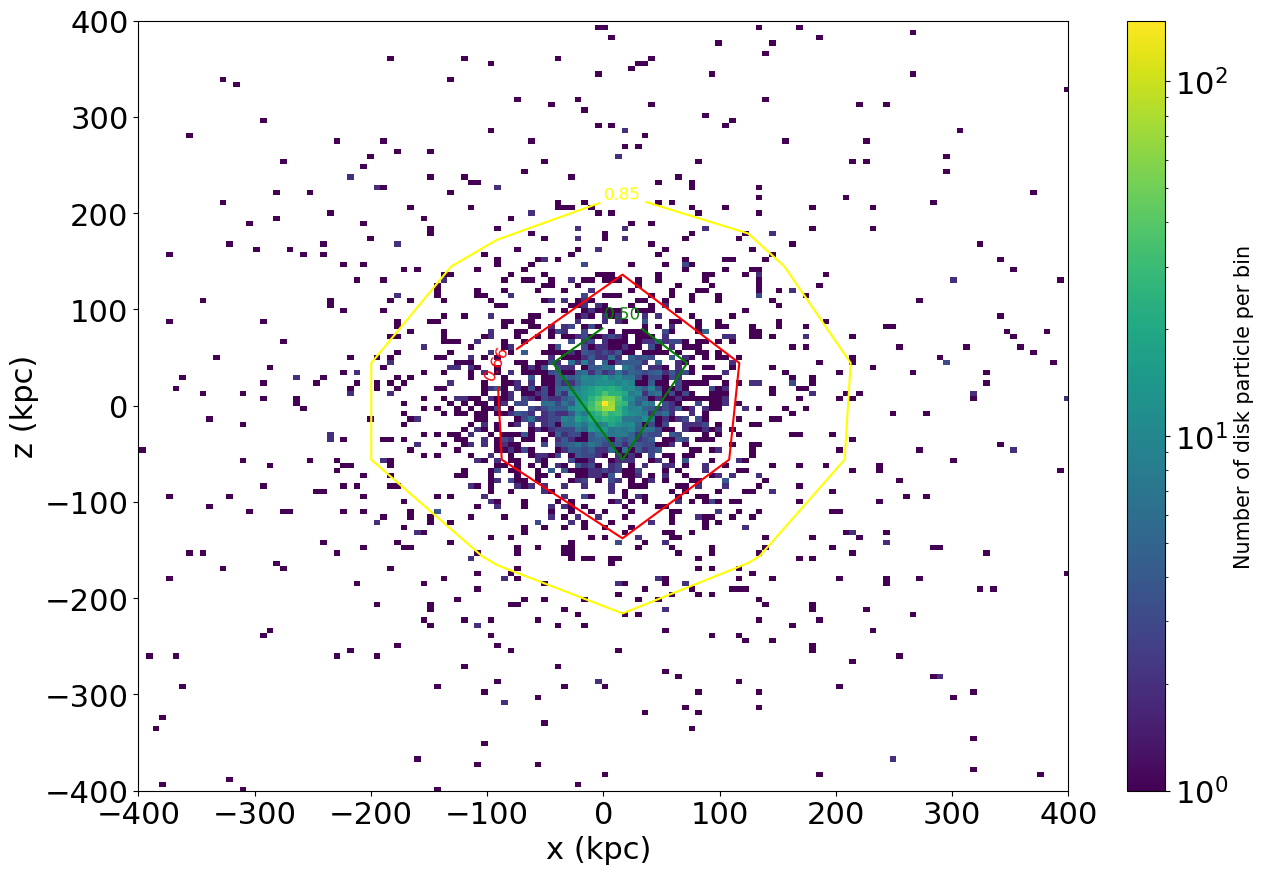

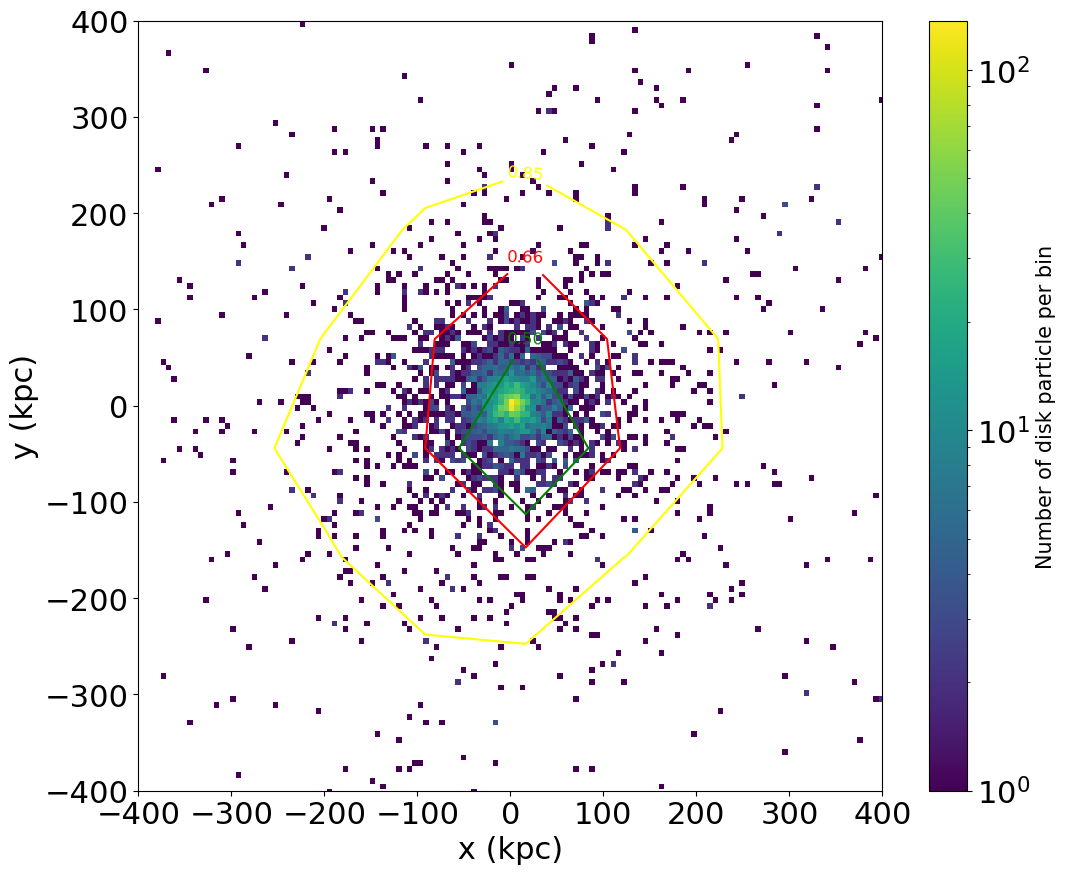

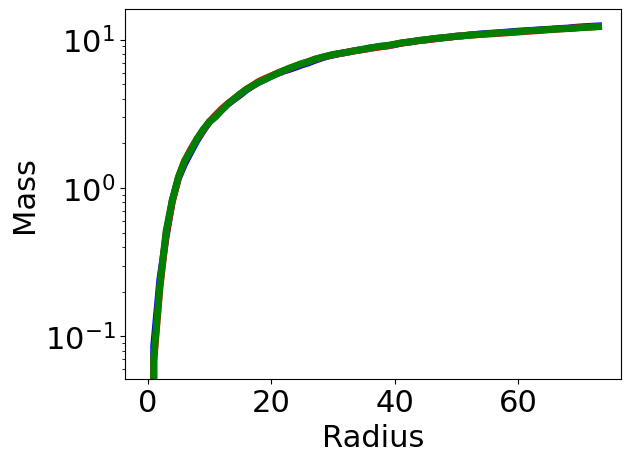

Hits enclosed mass of 12.372441900000002 along the x axis at jacobi radius 73.38293948405119
Hits enclosed mass of 12.275403140000002 along the y axis at jacobi radius 73.38293948405119
Hits enclosed mass of 12.226883760000002 along the z axis at jacobi radius 73.38293948405119
M33_300.txt


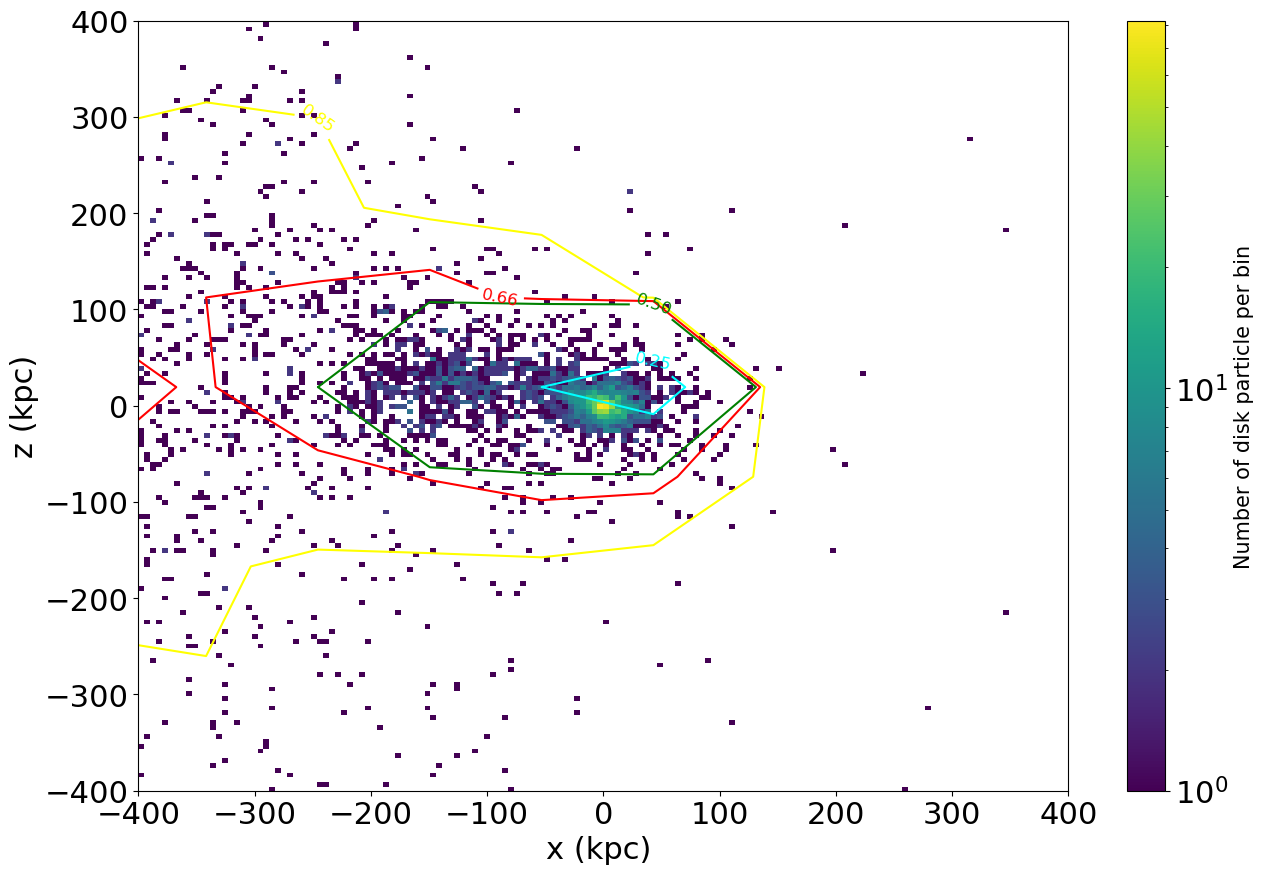

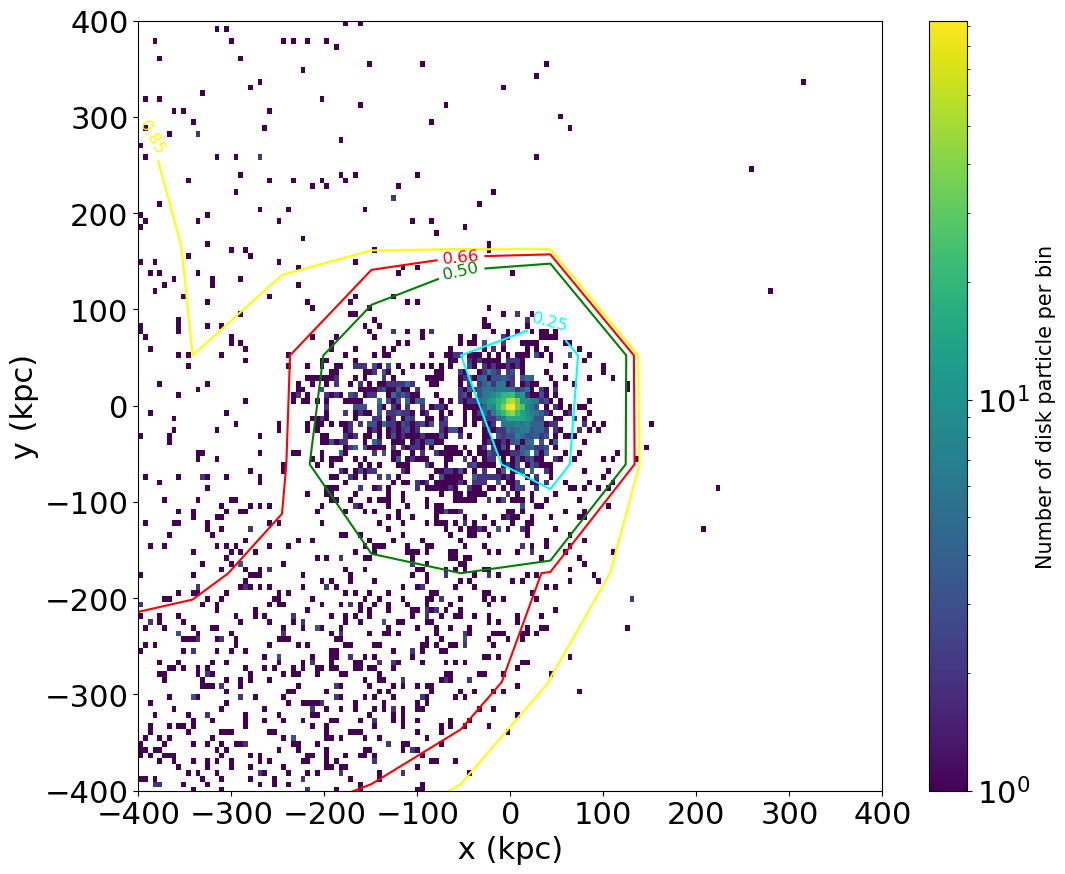

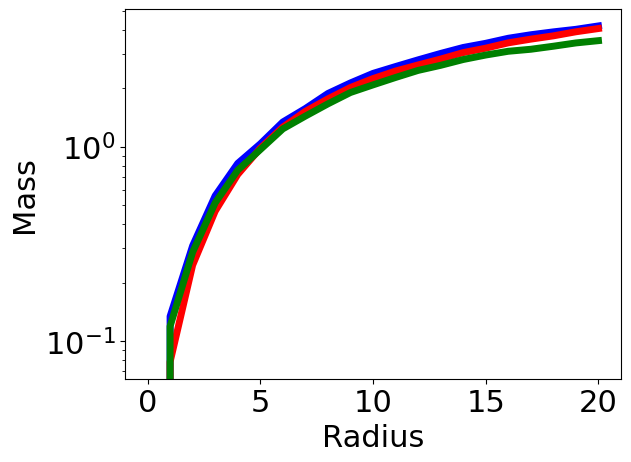

Hits enclosed mass of 4.176401178000001 along the x axis at jacobi radius 20.41777380077406
Hits enclosed mass of 4.04950427 along the y axis at jacobi radius 20.41777380077406
Hits enclosed mass of 3.5083262800000004 along the z axis at jacobi radius 20.41777380077406
M33_340.txt


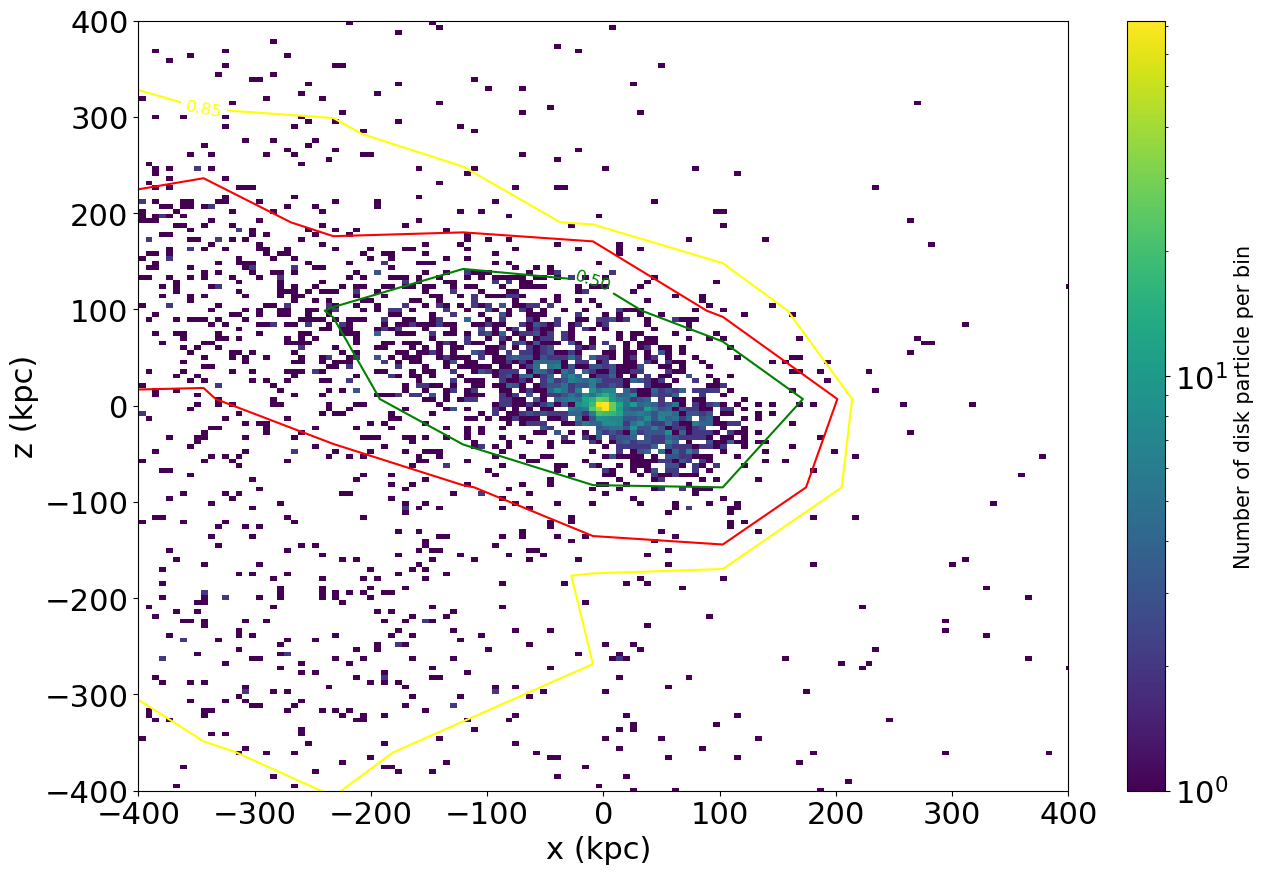

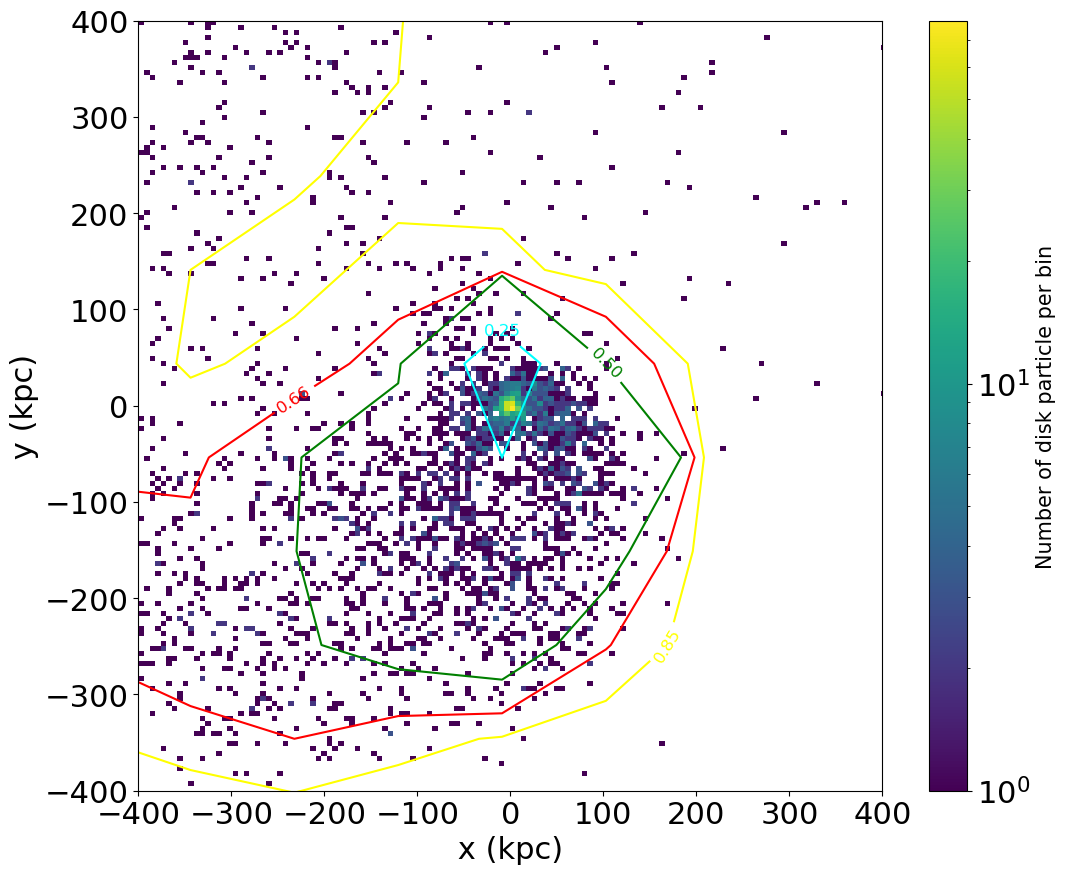

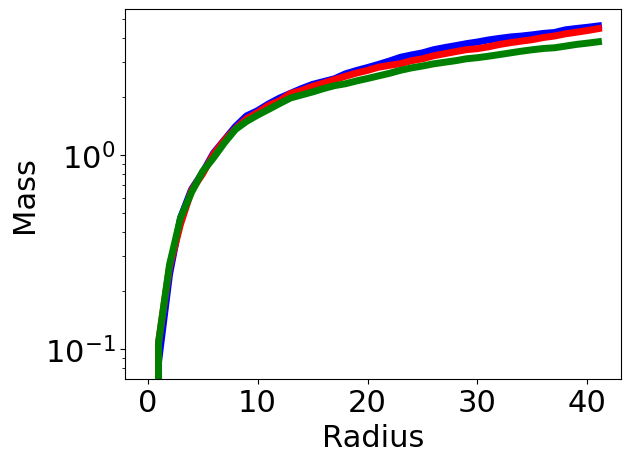

Hits enclosed mass of 4.624272618 along the x axis at jacobi radius 41.105396808775936
Hits enclosed mass of 4.478714399999999 along the y axis at jacobi radius 41.105396808775936
Hits enclosed mass of 3.8330330740000003 along the z axis at jacobi radius 41.105396808775936
M33_380.txt


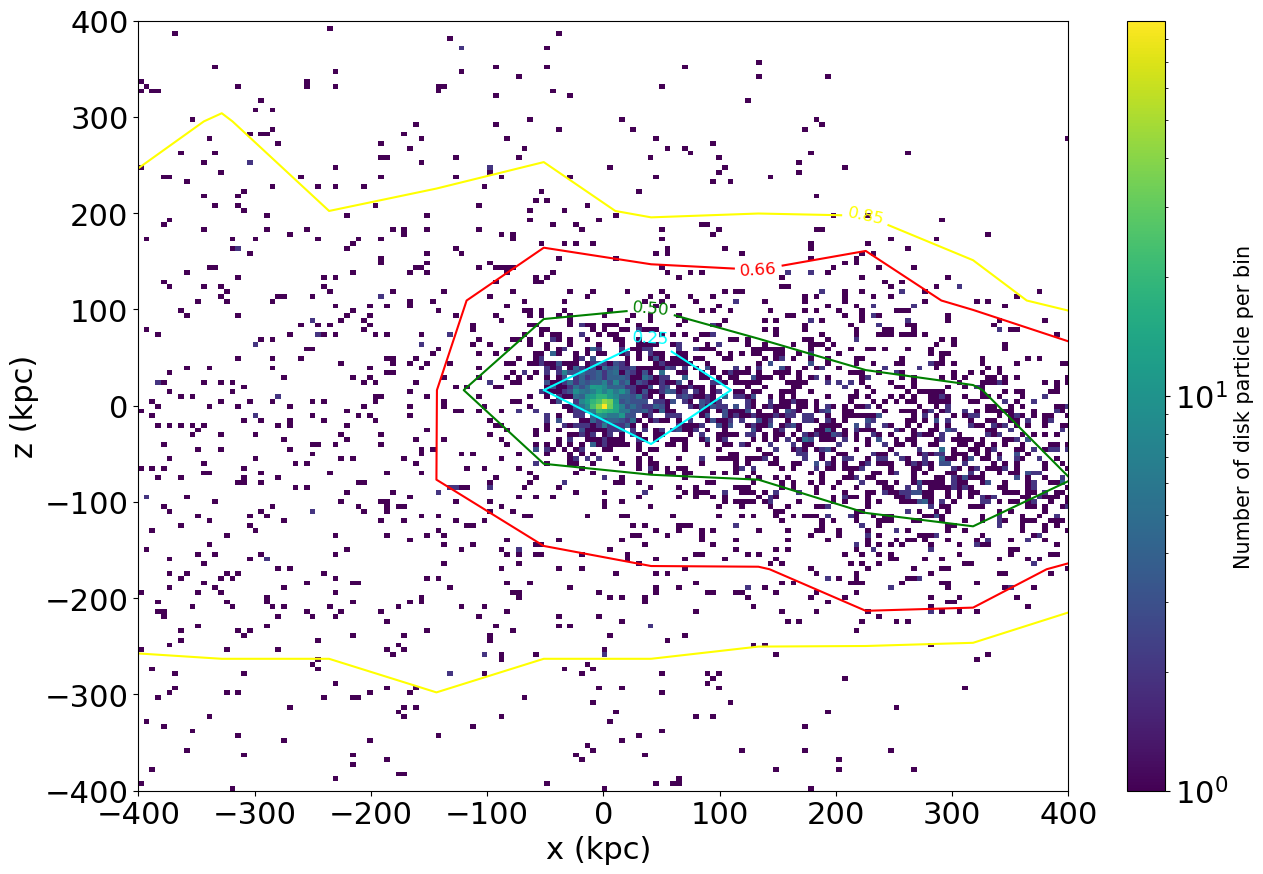

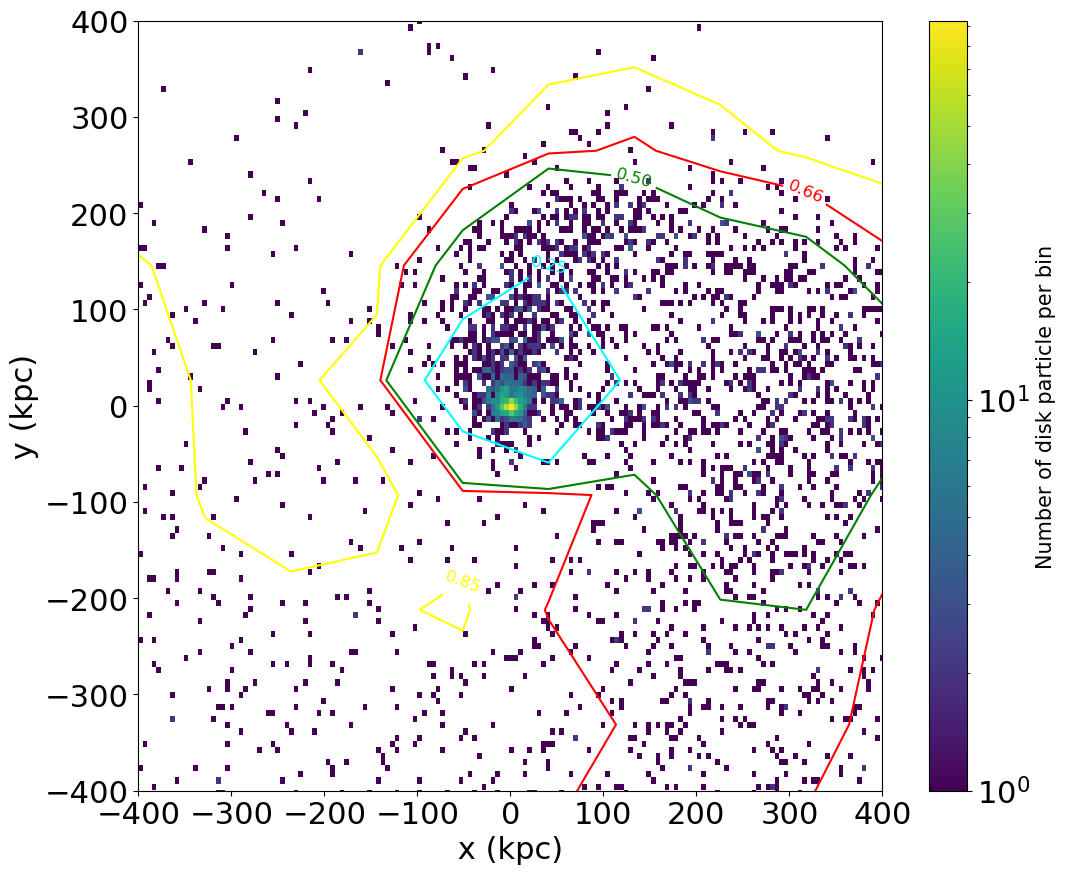

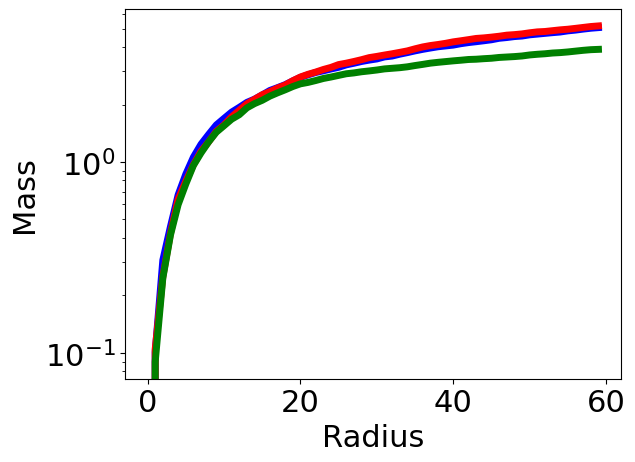

Hits enclosed mass of 5.060947272 along the x axis at jacobi radius 59.944747865481226
Hits enclosed mass of 5.165450608 along the y axis at jacobi radius 59.944747865481226
Hits enclosed mass of 3.892749266 along the z axis at jacobi radius 59.944747865481226
M33_705.txt


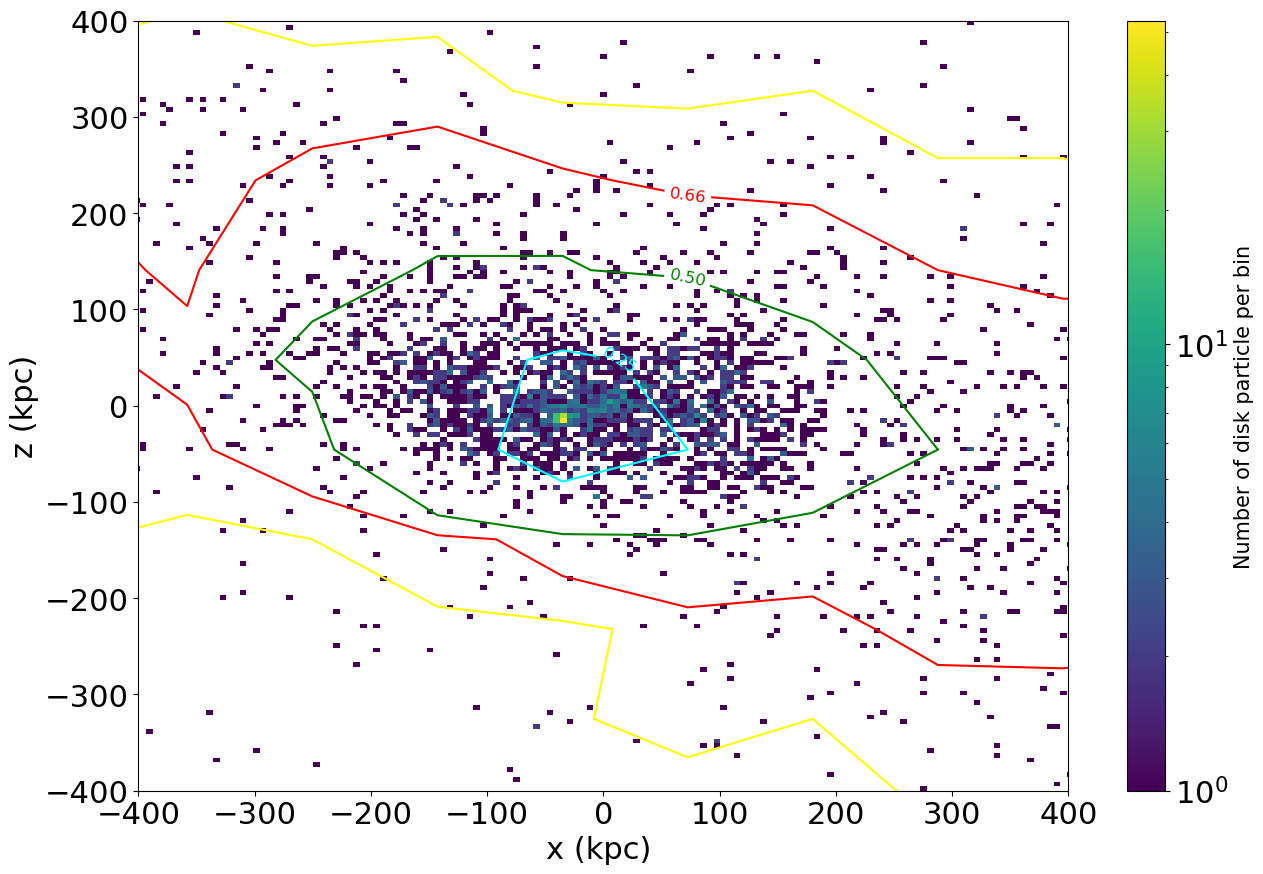

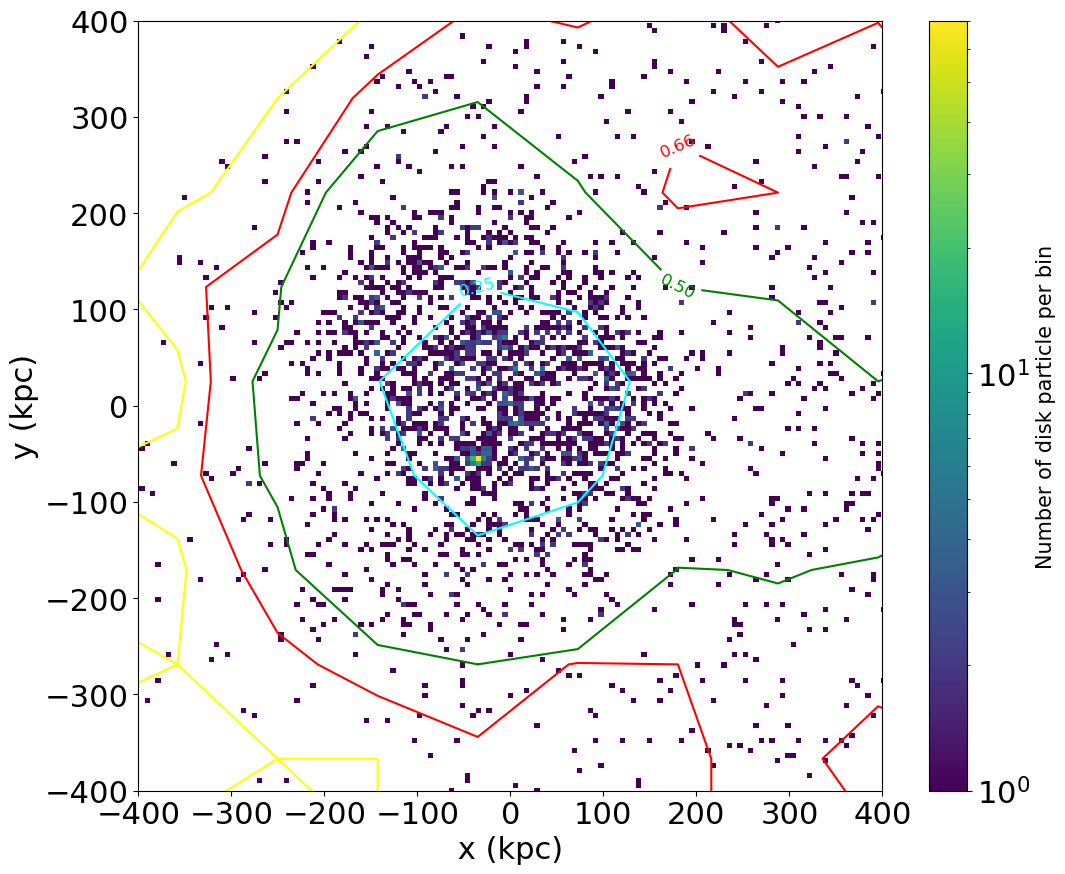

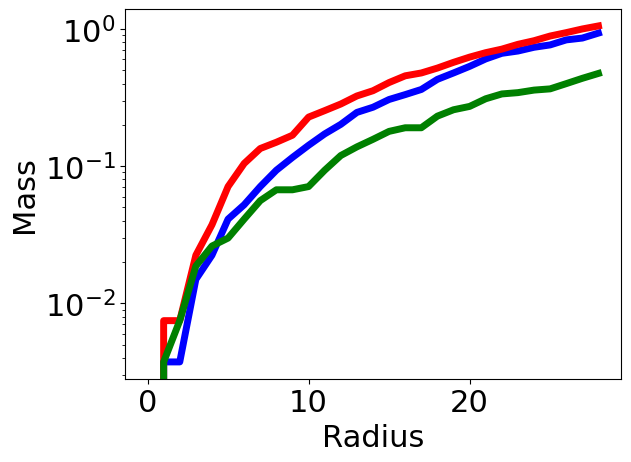

Hits enclosed mass of 0.9330655 along the x axis at jacobi radius 28.24712664467839
Hits enclosed mass of 1.052497884 along the y axis at jacobi radius 28.24712664467839
Hits enclosed mass of 0.4739972739999999 along the z axis at jacobi radius 28.24712664467839
M33_740.txt


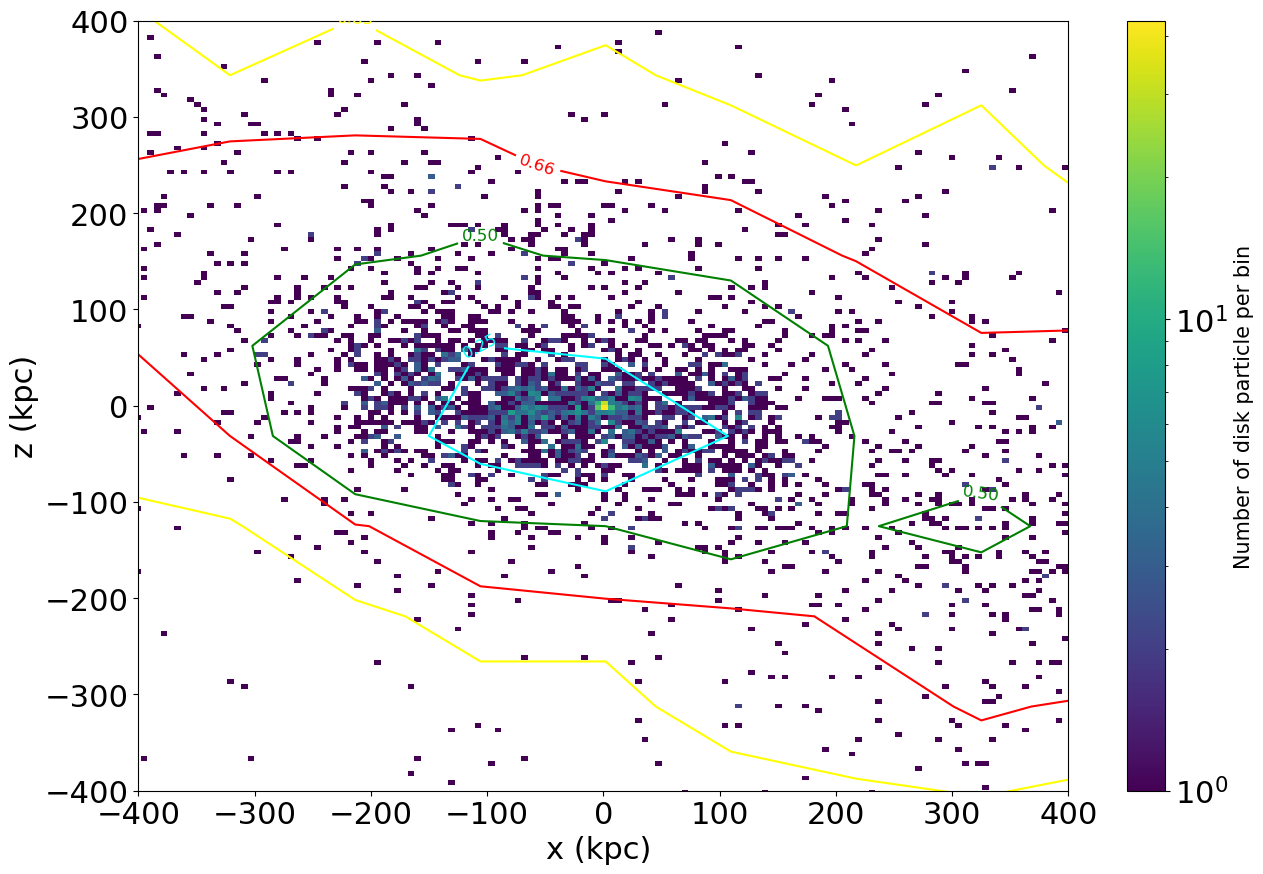

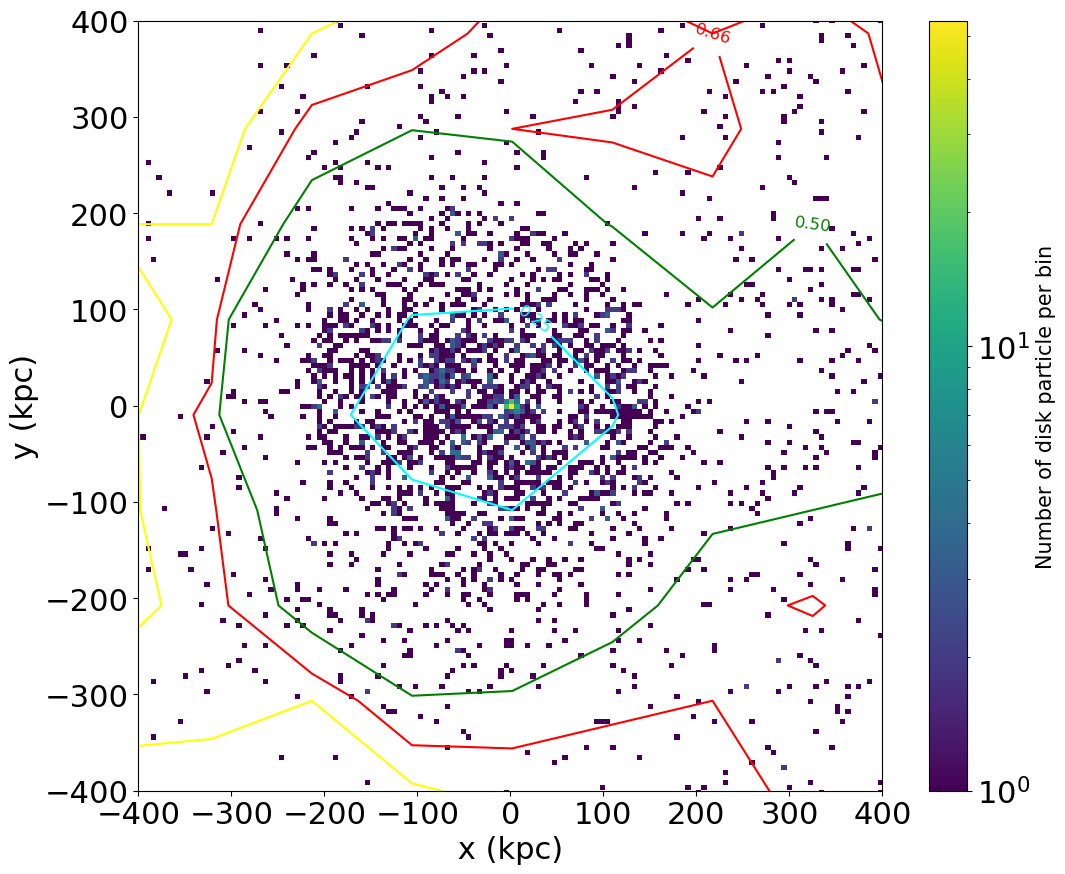

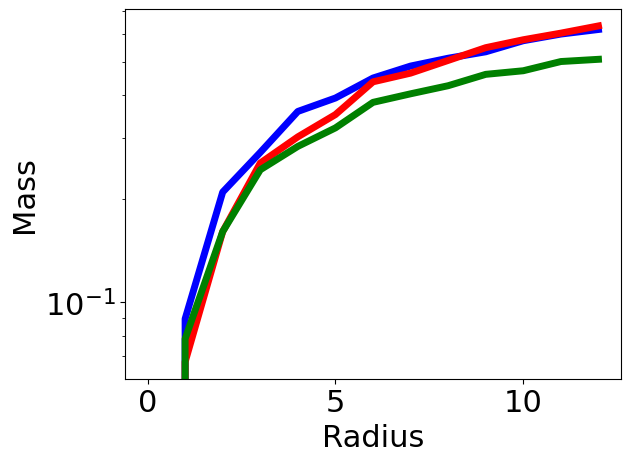

Hits enclosed mass of 0.6195554919999999 along the x axis at jacobi radius 12.905148157960816
Hits enclosed mass of 0.63448454 along the y axis at jacobi radius 12.905148157960816
Hits enclosed mass of 0.507587632 along the z axis at jacobi radius 12.905148157960816


In [53]:
# Shows the cylindrical mass profiles, stopping at the jacobi radius
galaxy = 'M33'
for i in range(len(snaps)):
    ilbl = '000' + str(snaps[i])
    ilbl = ilbl[-3:]
    filename = "%s_"%(galaxy) + ilbl+ '.txt'
    print (filename)
    rn, mnew = mass_prof(filename,1,'yes')
    Radius = np.arange(0,500,1)
    tm, rad, tmx = mass_profile(Radius,mnew,rn,'x',jac[i])
    mass_profiles = MassProfileplt(Radius,mnew,rn,jac[i])

M33_000.txt


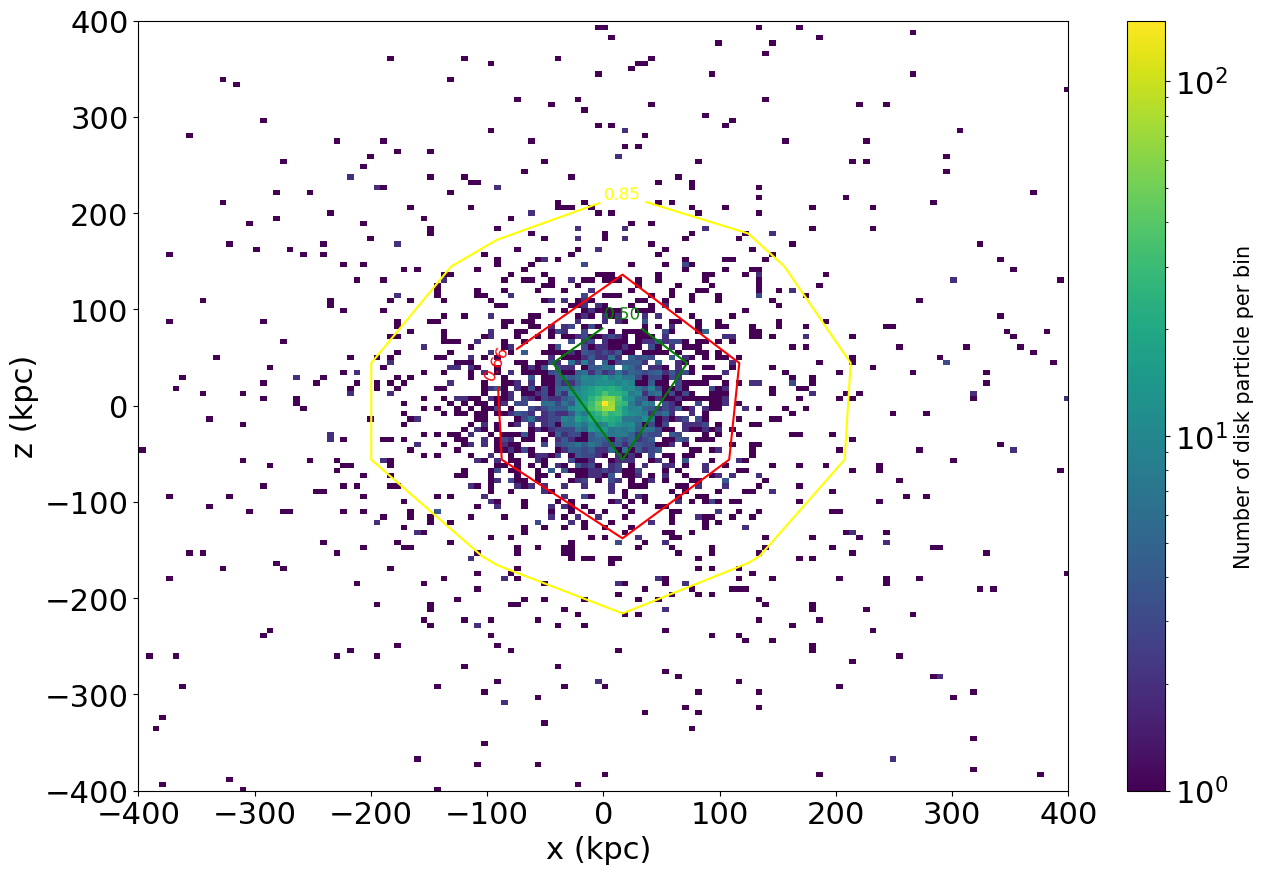

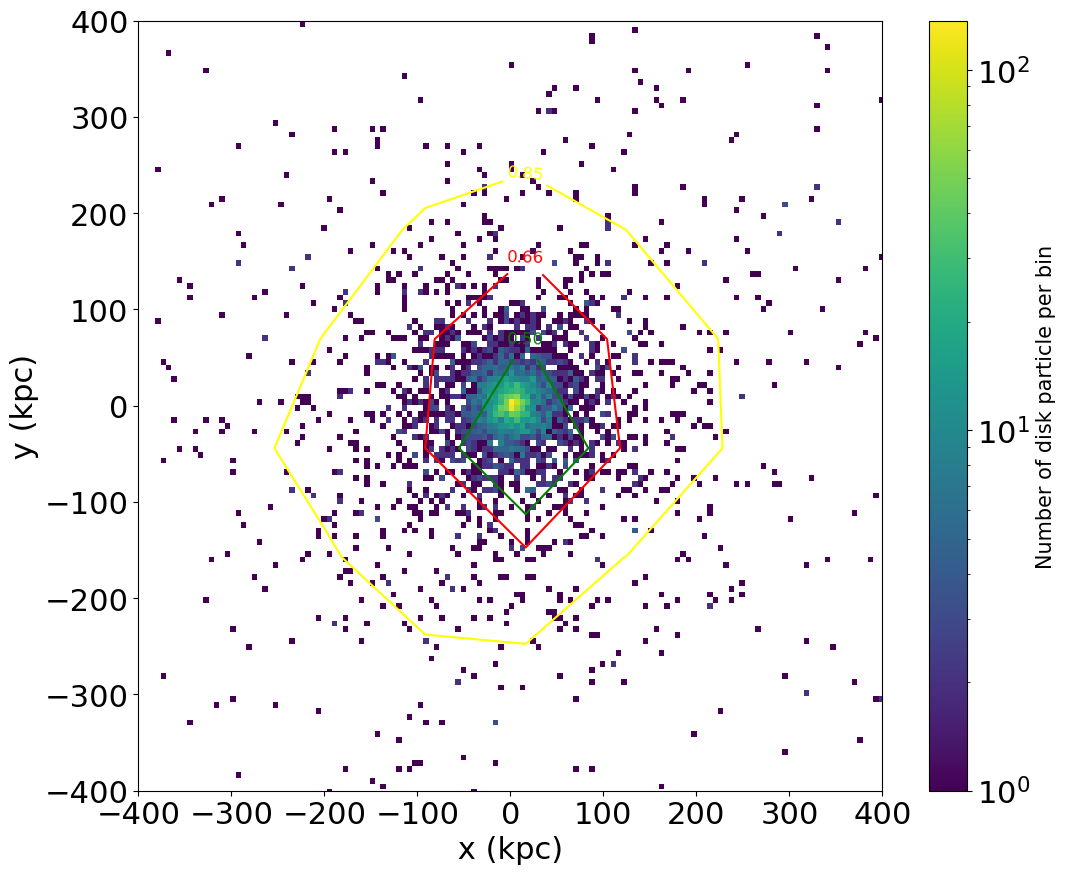

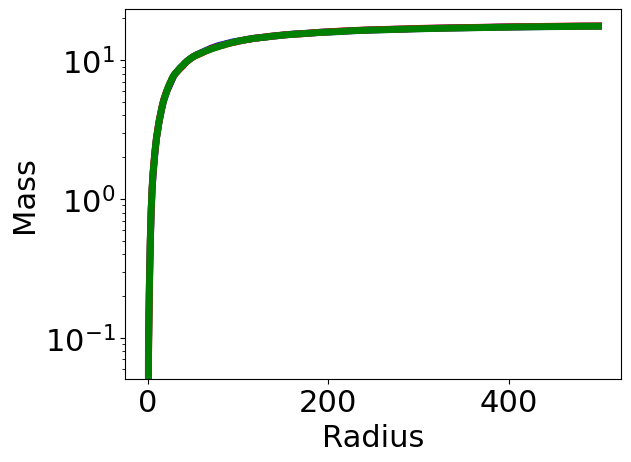

M33_300.txt


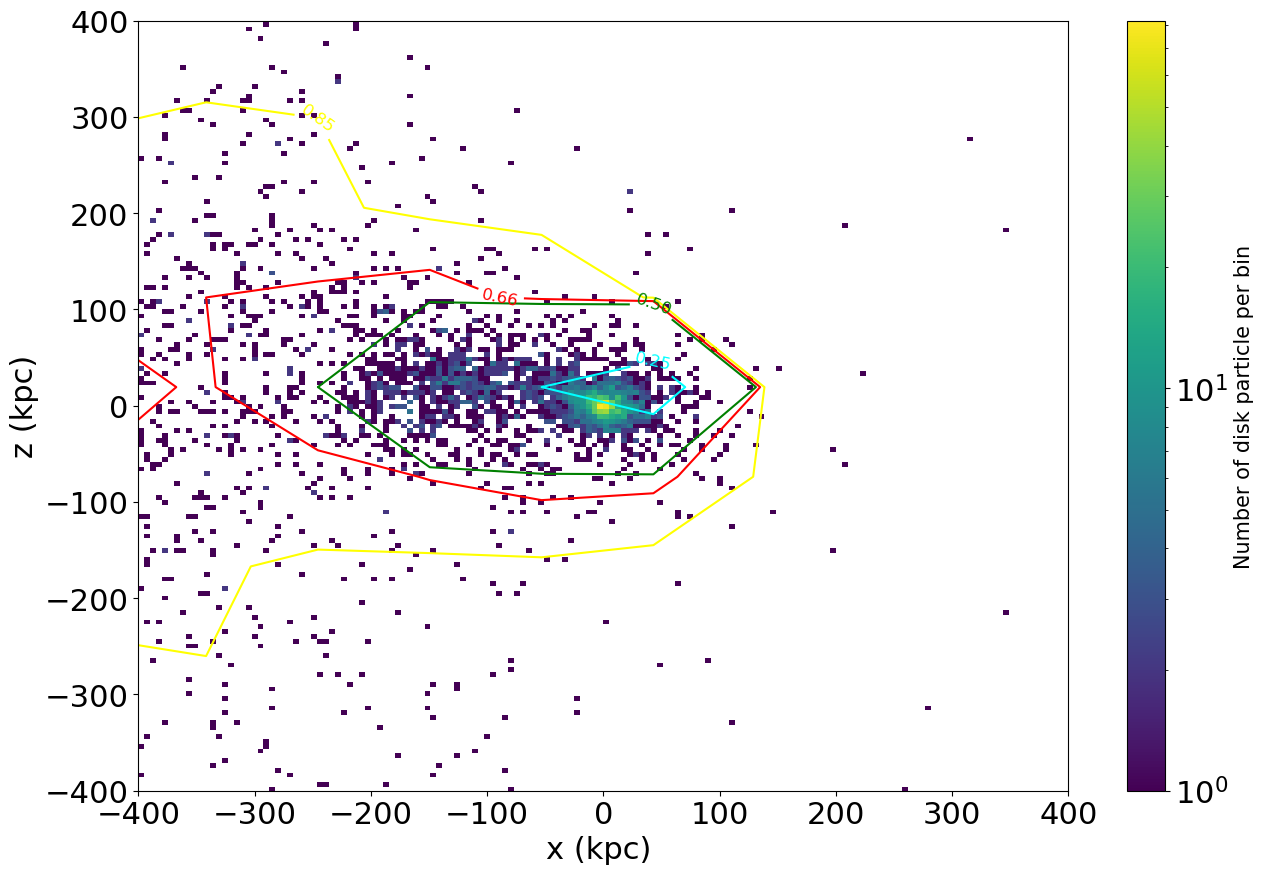

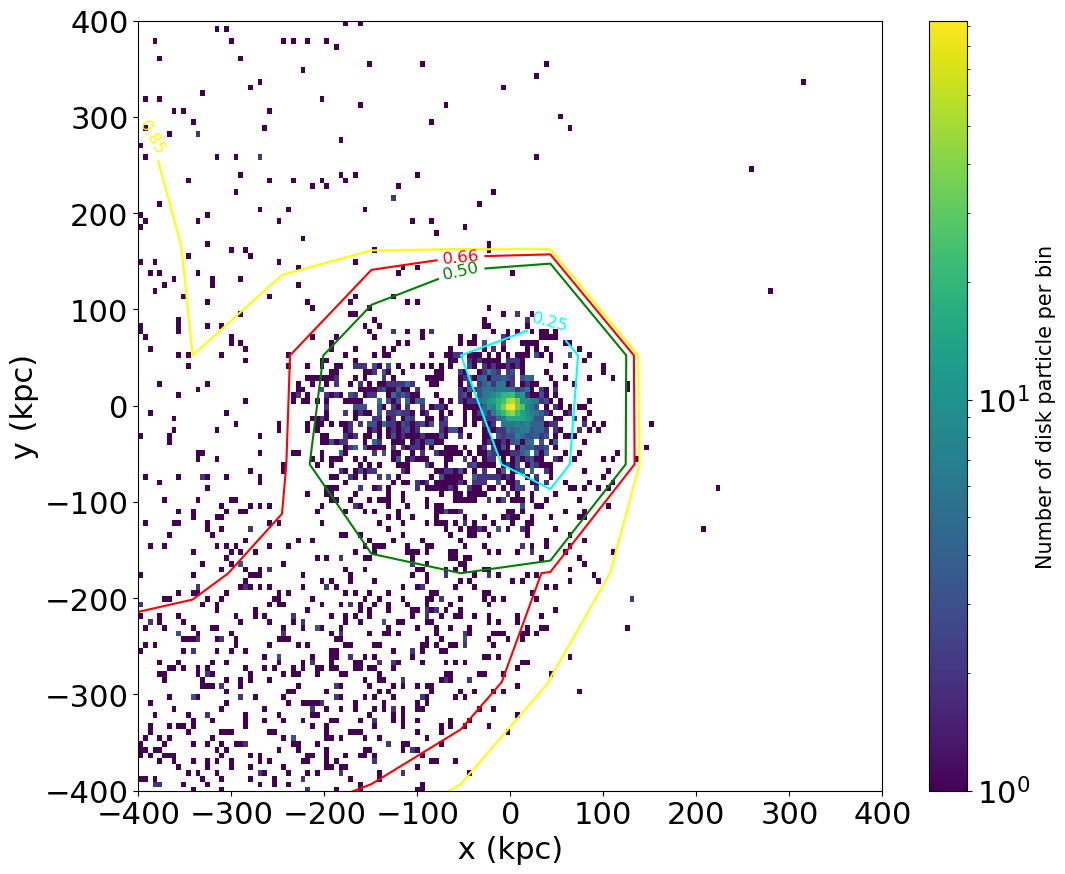

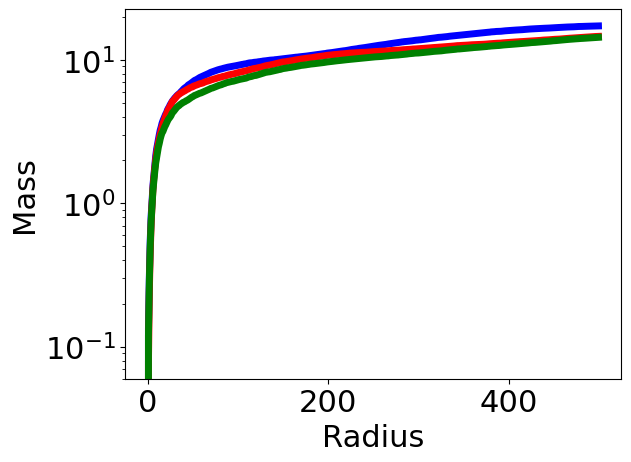

M33_340.txt


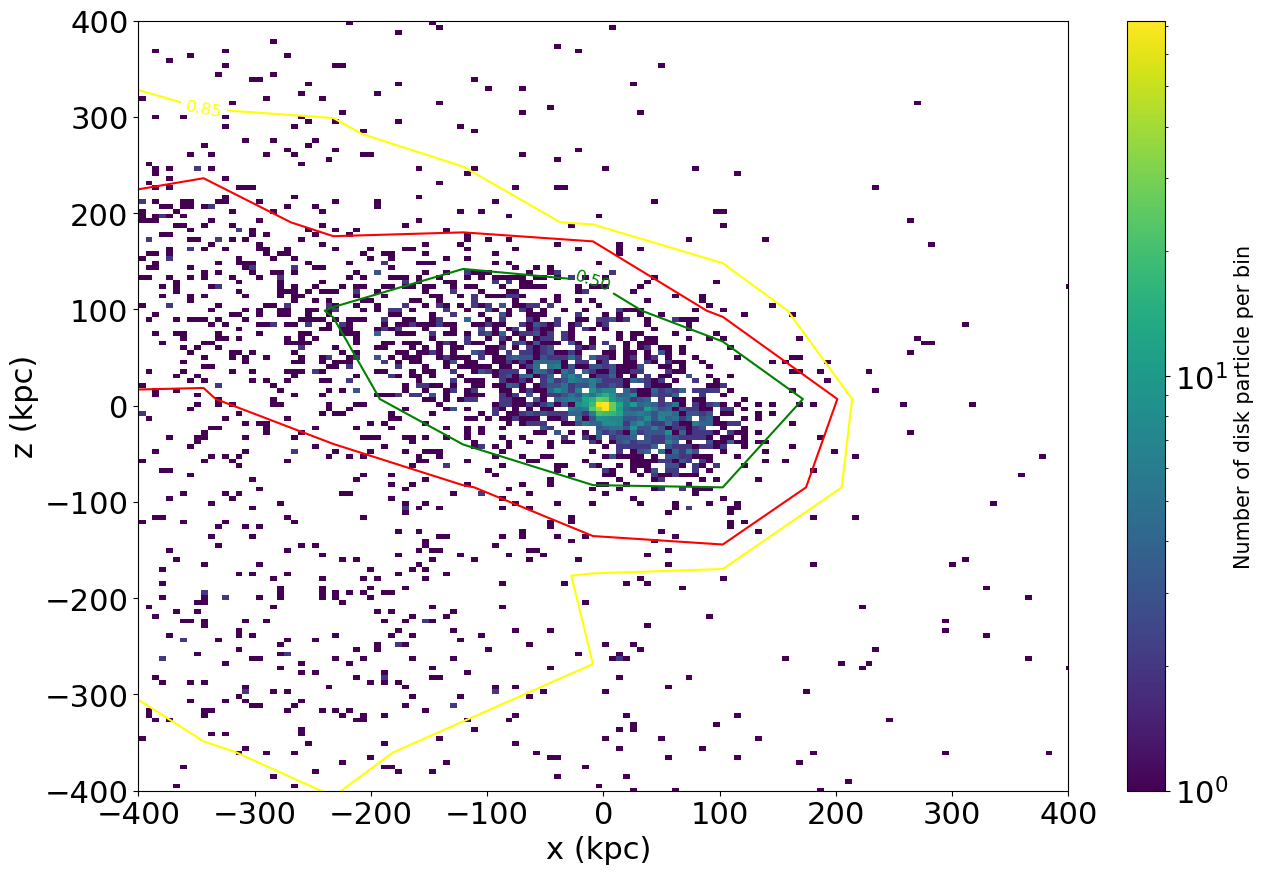

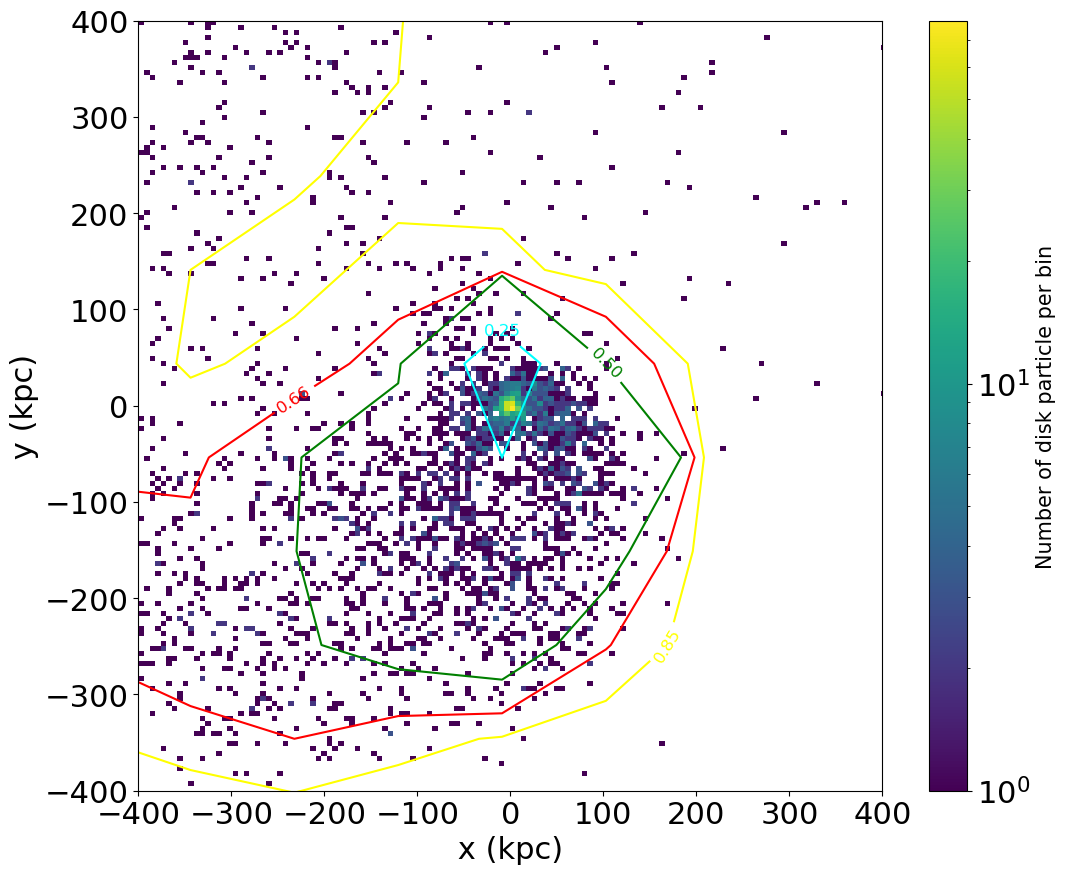

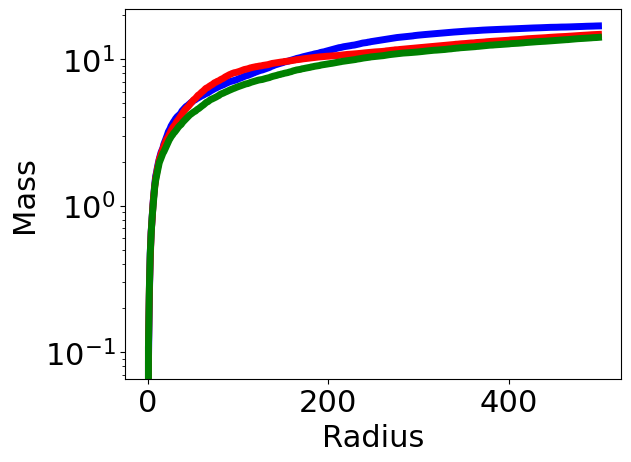

M33_380.txt


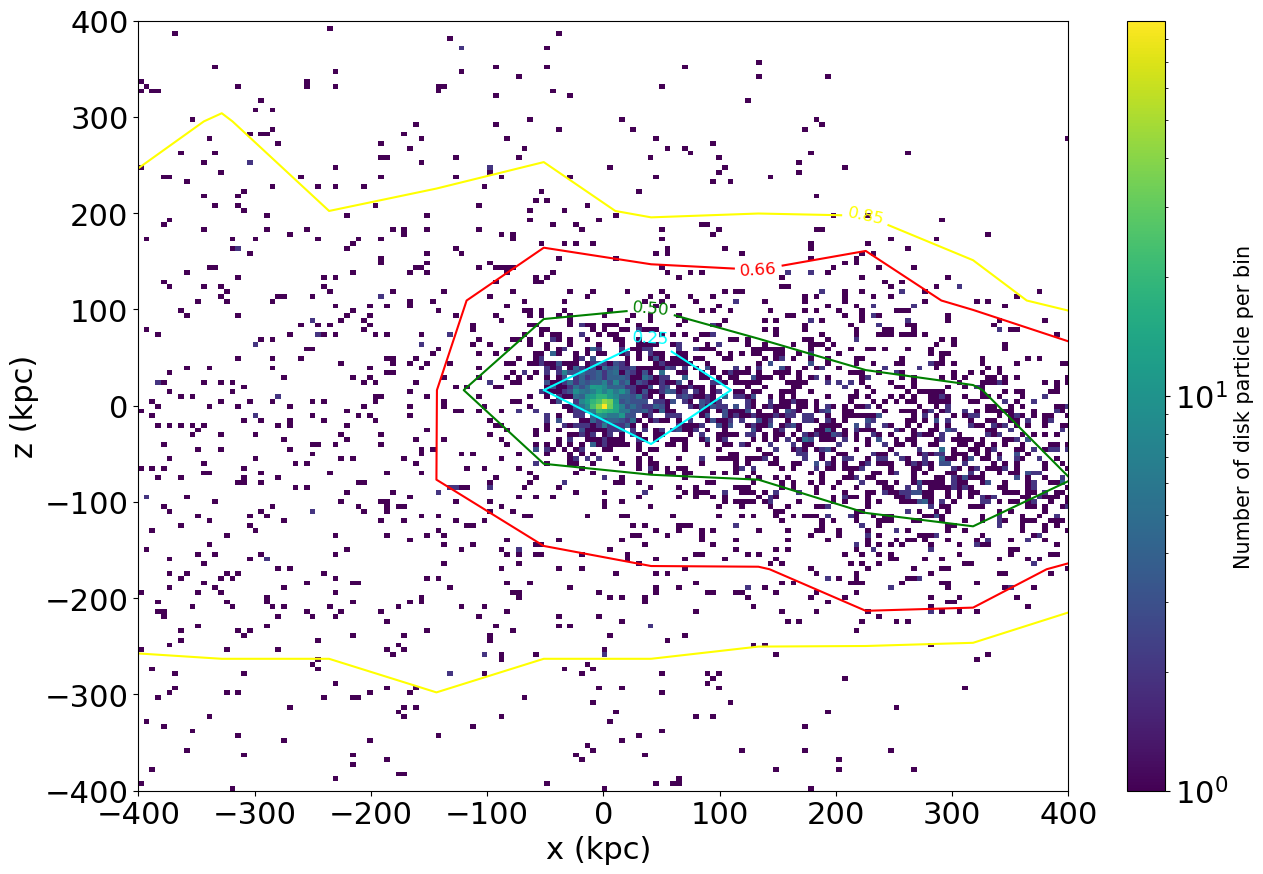

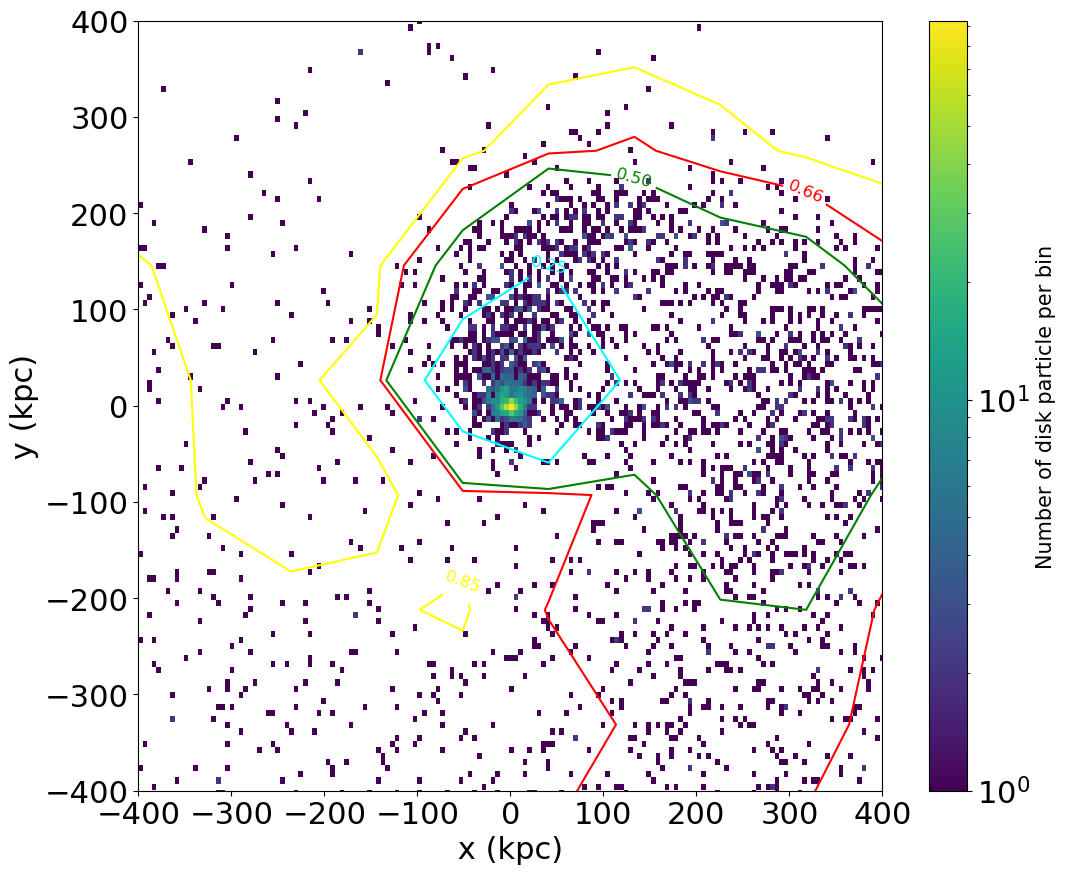

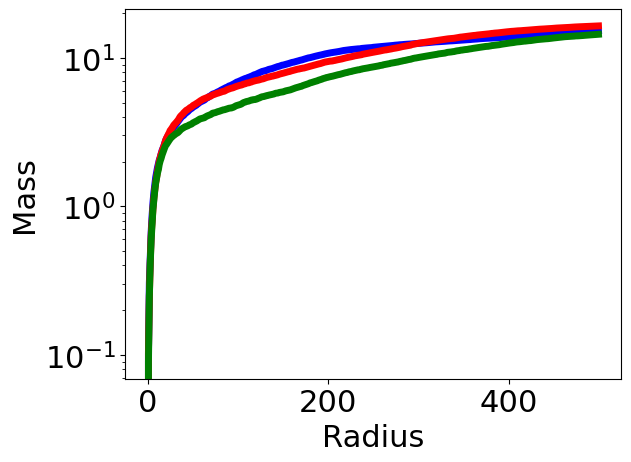

M33_705.txt


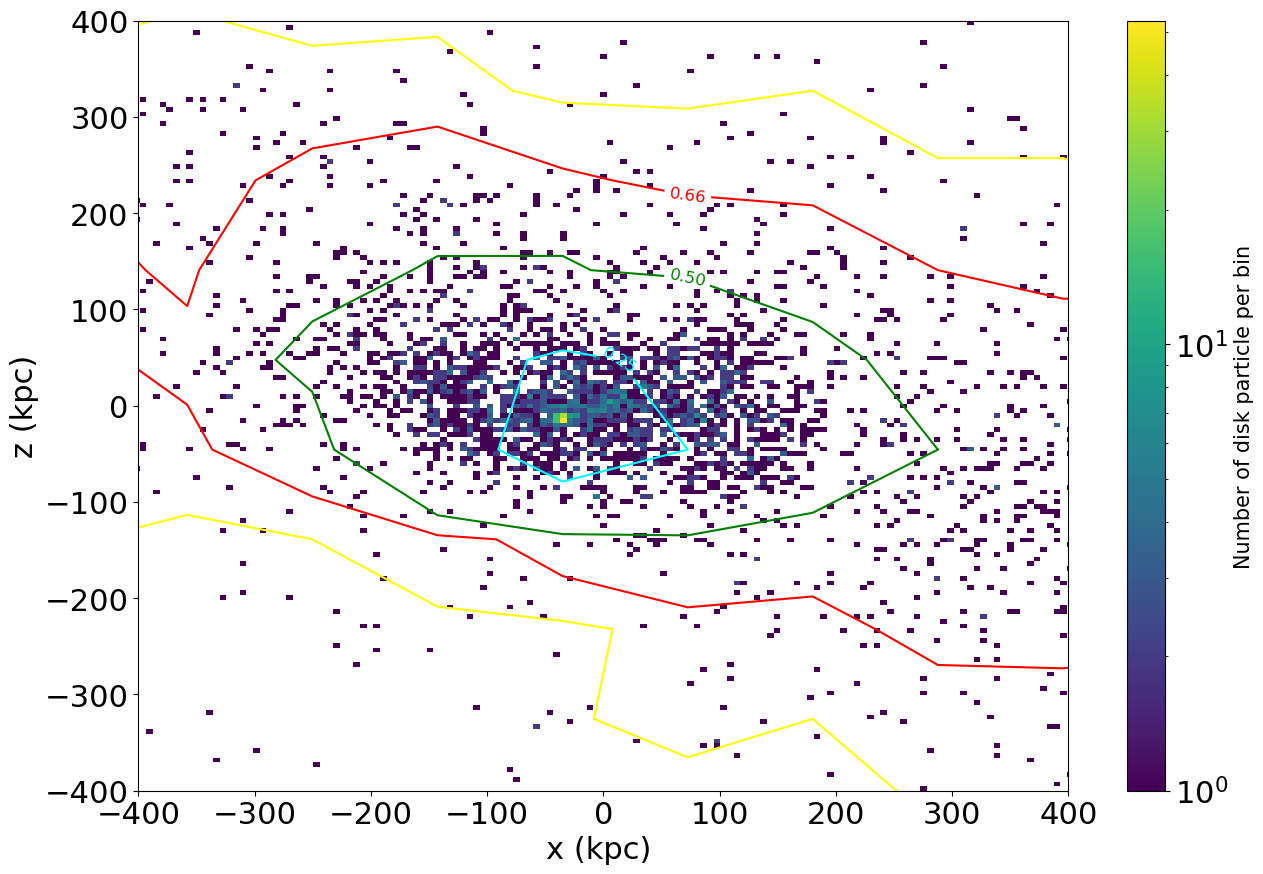

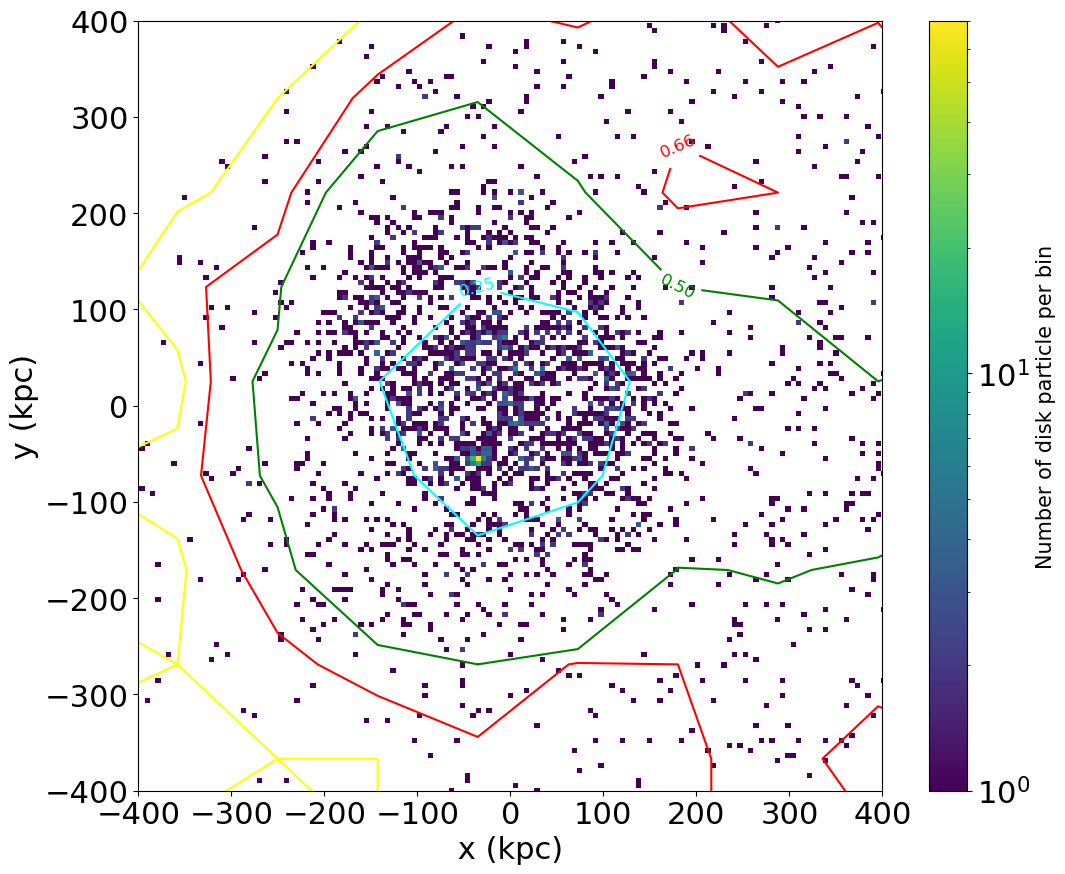

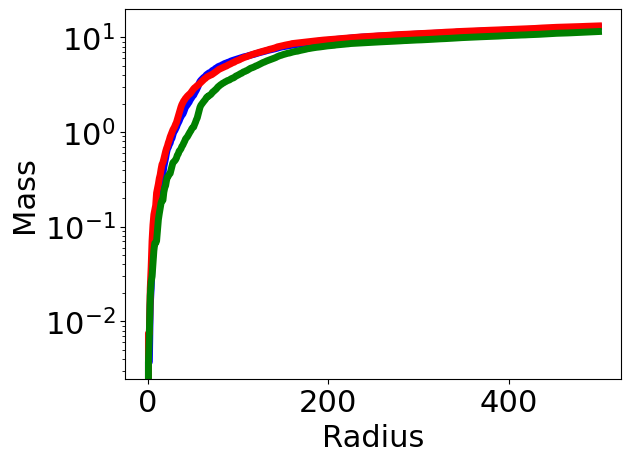

M33_740.txt


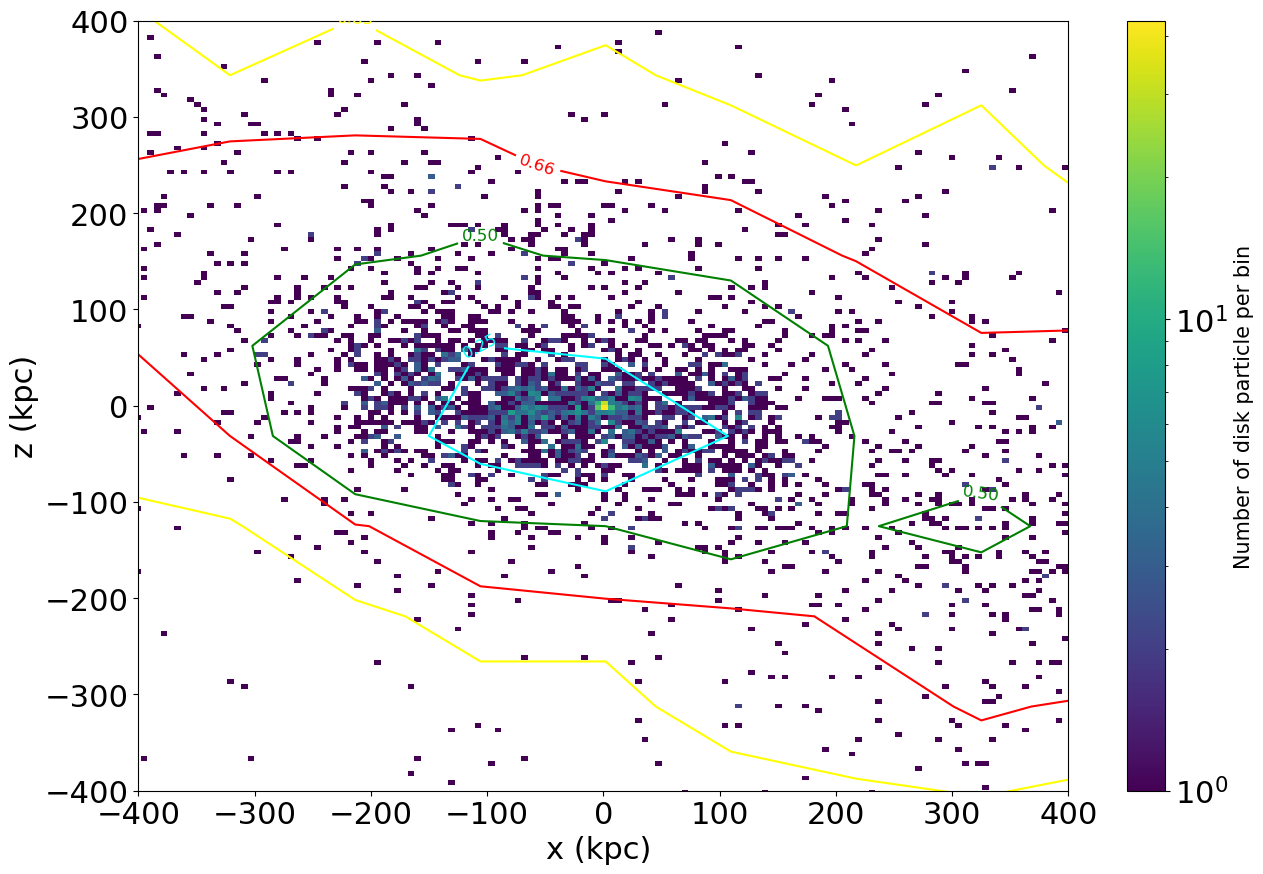

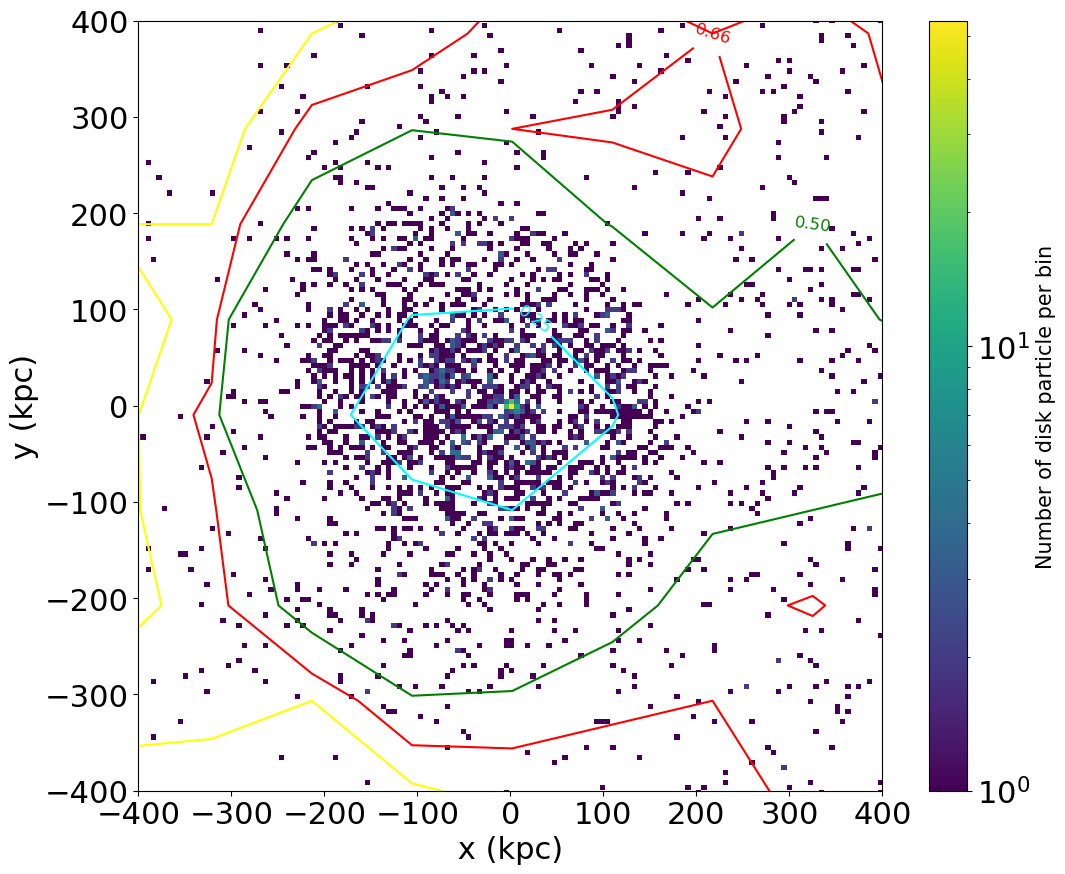

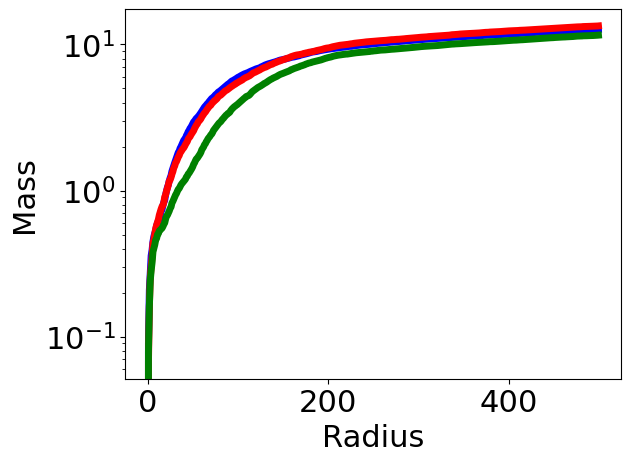

In [55]:
# Shows the cylindrical mass profiles without the jacobi radius
galaxy = 'M33'
for i in range(len(snaps)):
    ilbl = '000' + str(snaps[i])
    ilbl = ilbl[-3:]
    filename = "%s_"%(galaxy) + ilbl+ '.txt'
    print (filename)
    rn, mnew = mass_prof(filename,1,'yes')
    Radius = np.arange(0,500,1)
    tm, rad = mass_profile2(Radius,mnew,rn,'x',jac[i])
    mass_profiles = MassProfileplt2(Radius,mnew,rn,jac[i])